Import Libarary

In [6]:
import threading
import math
import pandas as pd
import matplotlib.pyplot as plt

Open Data

In [7]:
df = pd.read_csv('../../train.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


use 100% of the data

In [8]:
rows = df.to_dict(orient="records")
rows

[{'id': 'id2875421',
  'vendor_id': 2,
  'pickup_datetime': '2016-03-14 17:24:55',
  'dropoff_datetime': '2016-03-14 17:32:30',
  'passenger_count': 1,
  'pickup_longitude': -73.98215484619139,
  'pickup_latitude': 40.76793670654297,
  'dropoff_longitude': -73.96463012695312,
  'dropoff_latitude': 40.765602111816406,
  'store_and_fwd_flag': 'N',
  'trip_duration': 455},
 {'id': 'id2377394',
  'vendor_id': 1,
  'pickup_datetime': '2016-06-12 00:43:35',
  'dropoff_datetime': '2016-06-12 00:54:38',
  'passenger_count': 1,
  'pickup_longitude': -73.98041534423827,
  'pickup_latitude': 40.738563537597656,
  'dropoff_longitude': -73.99948120117188,
  'dropoff_latitude': 40.731151580810554,
  'store_and_fwd_flag': 'N',
  'trip_duration': 663},
 {'id': 'id3858529',
  'vendor_id': 2,
  'pickup_datetime': '2016-01-19 11:35:24',
  'dropoff_datetime': '2016-01-19 12:10:48',
  'passenger_count': 1,
  'pickup_longitude': -73.97902679443358,
  'pickup_latitude': 40.763938903808594,
  'dropoff_longitu

Shorting Process with Thread Processing

In [9]:
def threaded_sort(data_chunk, result_list, index):
    result_list[index] = sorted(data_chunk, key=lambda x: x["trip_duration"])


In [10]:
data_to_sort = rows  
num_threads = 4
chunk_size = math.ceil(len(data_to_sort) / num_threads)

sorted_chunks = [None] * num_threads
threads = []

for i in range(num_threads):
    chunk = data_to_sort[i * chunk_size : (i + 1) * chunk_size]
    t = threading.Thread(target=threaded_sort, args=(chunk, sorted_chunks, i))
    threads.append(t)
    t.start()

for t in threads:
    t.join()

combined_sorted = []
for chunk in sorted_chunks:
    if chunk:
        combined_sorted.extend(chunk)

final_sorted_rows = sorted(combined_sorted, key=lambda x: x["trip_duration"])


In [14]:
df_sorted = pd.DataFrame(final_sorted_rows)
df_sorted.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2536510,1,2016-04-17 11:44:49,2016-04-17 11:44:50,1,-73.940384,40.786423,-73.940300,40.786373,N,1
1,id1520236,1,2016-05-17 09:03:38,2016-05-17 09:03:39,1,-73.819893,40.740822,-73.819885,40.740822,N,1
2,id0553321,2,2016-04-11 19:01:35,2016-04-11 19:01:36,1,-73.945999,40.792202,-73.947411,40.792740,N,1
3,id1491861,1,2016-04-24 11:35:40,2016-04-24 11:35:41,1,-73.841423,40.695278,-73.841423,40.695274,N,1
4,id0075470,1,2016-03-07 16:12:28,2016-03-07 16:12:29,1,-73.980690,40.744419,-73.980690,40.744419,N,1


Visualized The Data

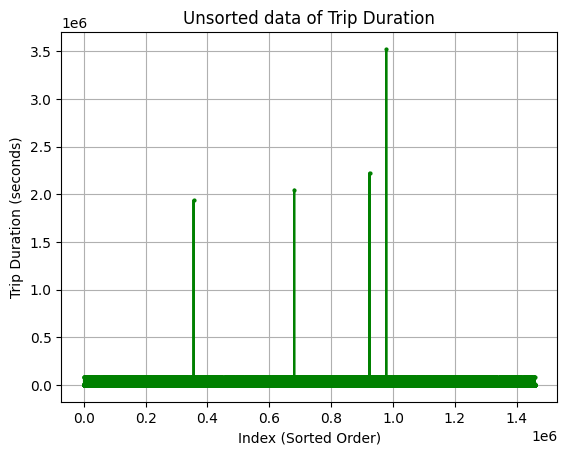

In [12]:
plt.plot(df["trip_duration"], marker='o', linestyle='-', markersize=2, color='green')
plt.title("Unsorted data of Trip Duration")
plt.xlabel("Index (Sorted Order)")
plt.ylabel("Trip Duration (seconds)")
plt.grid(True)
plt.show()

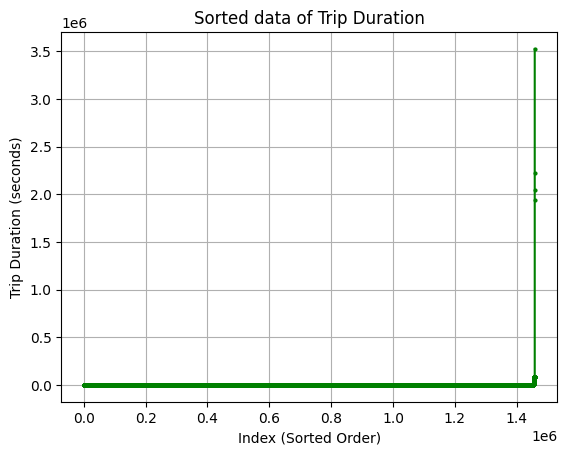

In [15]:
plt.plot(df_sorted["trip_duration"], marker='o', linestyle='-', markersize=2, color='green')
plt.title("Sorted data of Trip Duration")
plt.xlabel("Index (Sorted Order)")
plt.ylabel("Trip Duration (seconds)")
plt.grid(True)
plt.show()